In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

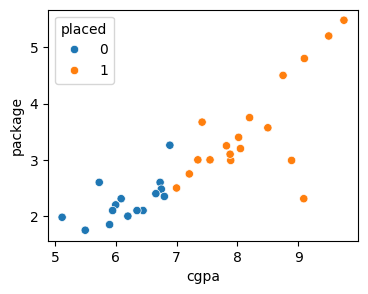

(77.77777777777779, 62.5)

In [2]:
data=pd.read_csv(r"C:\python\deeplearning\datasets\binarylogistic.csv")
data.head(3)
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa",y="package",data=data,hue="placed")
plt.show()

x=data.iloc[:,:-1]
y=data["placed"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.3)

from sklearn.linear_model import Perceptron
pr=Perceptron()
pr.fit(x_train,y_train)
pr.score(x_train,y_train)*100,pr.score(x_test,y_test)*100



c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

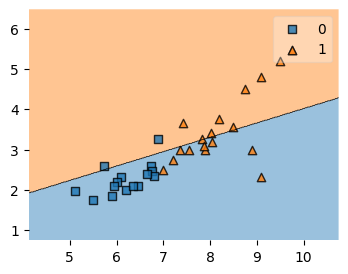

In [3]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=pr)

Practical application of multi layer perceptron in analyzing bank customer data

In [4]:
data=pd.read_csv(r"C:\python\deeplearning\datasets\churndata.csv")
input_data=data.iloc[:,:-1]
output_data=data.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,random_state=42,test_size=0.5)



In [5]:
import tensorflow

from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2
ann=Sequential()

ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(5,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(5,activation="relu",kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(3,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(3,activation="relu",kernel_regularizer=L2(l2=0.01)))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())
ann.add(Dense(1,activation="sigmoid"))
# ann.add(Dropout(0.5))
# ann.add(BatchNormalization())

ann.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])   
ann.fit(x_train,y_train,batch_size=3,epochs=10,validation_data=(x_test,y_test),callbacks=EarlyStopping())#X_train.shape=(800,8) so 100 ,epochs means iteration 


c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.8370 - loss: 0.9228 - val_accuracy: 0.5333 - val_loss: 0.9258
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6981 - loss: 0.9195 - val_accuracy: 0.5333 - val_loss: 0.9216
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7815 - loss: 0.9120 - val_accuracy: 0.5333 - val_loss: 0.9175
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7491 - loss: 0.9087 - val_accuracy: 0.5333 - val_loss: 0.9135
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7583 - loss: 0.8908 - val_accuracy: 0.5333 - val_loss: 0.9096
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6472 - loss: 0.8992 - val_accuracy: 0.5333 - val_loss: 0.9057
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7491 - loss: 0.8892 - val_accuracy: 0.5333 - val_loss: 0.9020
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7213 - loss: 0.8819 - val_accuracy: 0.5333 - val_loss: 0.8983

In [6]:
prd=ann.predict(x_test)

prd_data=[]

for i in prd:
    # print(i[0])
    if(i[0] > 0):
        prd_data.append(1)
    else:
        prd_data.append(0)
    
prd1=ann.predict(x_train)

prd_data1=[]

for i in prd:
    # print(i[0])
    if(i[0] > 0):
        prd_data1.append(1)
    else:
        prd_data1.append(0)
    
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prd_data)*100)
print(accuracy_score(y_train,prd_data1)*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
46.666666666666664
26.666666666666668


In [7]:
import numpy as np
input_data = np.array([[-0.941676, -1.360943, -1.003968, -0.735669, -1.143544, 0.603023, 0.935414, -0.937742]])
prd = ann.predict(input_data)
prd_data=[]

for i in prd:
    # print(i[0])
    if(i[0] > 0):
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data   


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


[1]

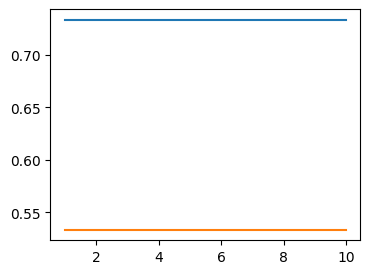

In [8]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]
plt.figure(figsize=(4,3))
plt.plot([i for i in range(1,11)],train_accuracy)
plt.plot([i for i in range(1,11)],test_accuracy)
plt.show()

CNN

In [22]:
import tensorflow
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cnn =Sequential()

In [23]:

cnn.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())

c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.add(Dense(64,activation="relu"))
cnn.add(Dense(32,activation="relu"))
cnn.add(Dense(16,activation="relu"))
cnn.add(Dense(8,activation="relu"))
cnn.add(Dense(4,activation="relu"))
cnn.add(Dense(1,activation="sigmoid"))


In [25]:
cnn.compile(loss="binary_crossentropy",optimizer="adam")


In [27]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/python/deeplearning/datasets/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'C:/python/deeplearning/datasets/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

cnn.fit(
        train_generator,
        steps_per_epoch=20,
        epochs=5,
        validation_data=test_generator)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - loss: 0.6926 - val_loss: 0.6929
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - loss: 0.6851 - val_loss: 0.6911
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - loss: 0.6986 - val_loss: 0.6918
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 420ms/step - loss: 0.6899 - val_loss: 0.6908
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - loss: 0.6908 - val_loss: 0.6940


In [32]:
from keras.preprocessing import image
import numpy as np
img=image.load_img(r"C:\python\deeplearning\datasets\single\cat.4015.jpg",target_size=(64,64))

img=image.img_to_array(img)

img=np.expand_dims(img,axis=0)
p=cnn.predict(img)
if p[0][0]<0.5:
    print("dog")
else:
    print("cat")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
dog
